In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pickle, json, os 
from mpl_toolkits.axes_grid1 import ImageGrid
from tensorflow.keras.preprocessing.image import load_img 
from 

In [ ]:
import shutil

In [ ]:
data_file = './data/'

In [ ]:
img_folder = './data/MAMe_data_256/data_256/'

In [ ]:
data_folder = 'data/MAMe_metadata/'
data_csv = data_folder + 'MAMe_dataset.csv' 
label_csv = data_folder + 'MAMe_labels.csv'

In [ ]:
data_df = pd.read_csv(data_csv) 

In [ ]:
data_df.head(20) 

In [ ]:
data_df.info() 

In [ ]:
data_df.describe() 

In [ ]:
cols = data_df.columns 
cols

In [ ]:
subsets =  data_df['Subset']. unique().tolist() 

In [ ]:
subsets

In [ ]:
for subset in subsets:
    subset_df = data_df[data_df['Subset'] == subset] 
    print('{} {} examples in MAME dataset'.format(len(subset_df), subset))    

In [ ]:
classes = sorted(data_df['Medium'].unique())

In [ ]:
num_classes = len(classes) 
num_classes

In [ ]:
cls_folder_dict = {'train': dict(), 'val': dict(), 'test': dict()}

In [ ]:
for subset in subsets:
    subset_folder = data_file + subset
    if not os.path.exists(subset_folder):
        os.mkdir(subset_folder)
    for cls in classes:
        cls_folder = subset_folder + '/' + cls + '/'
        cls_folder_dict[subset][cls] = cls_folder
        if not os.path.exists(cls_folder):
            os.mkdir(cls_folder)

In [ ]:
new_img_paths = []

In [ ]:
image_files = data_df[cols[0]].values
image_subsets = data_df[cols[4]].values
image_cls = data_df[cols[1]].values 

In [ ]:
for path, subset, cls in zip(image_files, image_subsets, image_cls):
    
    org_img_path = img_folder + path 
    img_path = cls_folder_dict[subset][cls] + path 
    new_img_paths.append(img_path)
    shutil.copyfile(org_img_path, img_path)

In [ ]:
len(new_img_paths)

In [ ]:
data_df['Organized_img_path'] = new_img_paths

In [ ]:
data_df.head(5)

In [ ]:
data_df.head()

In [ ]:
data_df = data_df.drop('organized_img_path', axis=1) 

In [ ]:
data_df.to_csv('Organized_MAMe_dataset.csv')

In [ ]:
def plot_data(classes, len_col):
    
    
    len_row = classes // len_col + int((classes // len_col) != 0) 
    for  cls in classes:
        row_idx = classes.index(cls) // len_col 
        col_idx = classes.index(cls) % len_col 
        
        
        
        
    print(len_row) 

In [ ]:
fig = plt.figure(figsize=(20.,20.))
grid = ImageGrid(fig, 111,  # similar to subplot(111)
                 nrows_ncols=(6, 5),  # creates 2x2 grid of axes
                 axes_pad=0.3,  # pad between axes in inch.
)

for ax, medium in zip(grid, list(np.unique(data_df.Medium))):
    filepath = data_df[data_df.Medium == medium].sample(1).Organized_img_path.values[0]
    img = load_img(filepath)
    ax.imshow(img)
    ax.title.label = "hi"
    ax.set_title(medium)
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

grid[-1].remove()

plt.show()

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pickle, json, os 
from mpl_toolkits.axes_grid1 import ImageGrid
from tensorflow.keras.preprocessing.image import load_img 
from 

In [ ]:
import shutil

In [ ]:
data_file = './data/'

In [ ]:
img_folder = './data/MAMe_data_256/data_256/'

In [ ]:
data_folder = 'data/MAMe_metadata/'
data_csv = data_folder + 'MAMe_dataset.csv' 
label_csv = data_folder + 'MAMe_labels.csv'

In [ ]:
data_df = pd.read_csv(data_csv) 

In [ ]:
data_df.head(20) 

Image file         Medium                      Museum  \
0   436018.jpg  Oil on canvas  Metropolitan Museum of Art   
1    11779.jpg  Oil on canvas  Metropolitan Museum of Art   
2    19022.jpg  Oil on canvas  Metropolitan Museum of Art   
3   435883.jpg  Oil on canvas  Metropolitan Museum of Art   
4    10481.jpg  Oil on canvas  Metropolitan Museum of Art   
5    13345.jpg  Oil on canvas  Metropolitan Museum of Art   
6    10215.jpg  Oil on canvas  Metropolitan Museum of Art   
7   437974.jpg  Oil on canvas  Metropolitan Museum of Art   
8    11974.jpg  Oil on canvas  Metropolitan Museum of Art   
9   436876.jpg  Oil on canvas  Metropolitan Museum of Art   
10   10474.jpg  Oil on canvas  Metropolitan Museum of Art   
11  437791.jpg  Oil on canvas  Metropolitan Museum of Art   
12   11177.jpg  Oil on canvas  Metropolitan Museum of Art   
13   16743.jpg  Oil on canvas  Metropolitan Museum of Art   
14   10472.jpg  Oil on canvas  Metropolitan Museum of Art   
15  435713.jpg  Oil on canvas  Metropolitan Museum of Art   
16  437971.jpg  Oil on canvas  Metropolitan Museum of Art   
17  435874.jpg  Oil on canvas  Metropolitan Museum of Art   
18  437658.jpg  Oil on canvas  Metropolitan Museum of Art   
19  436519.jpg  Oil on canvas  Metropolitan Museum of Art   

   Museum-based instance ID Subset   Width  Height  Product size  Aspect ratio  
0                 29.100.60  train  3144.0  3840.0    12072960.0        0.8187  
1                  1982.373  train  1707.0  2136.0     3646152.0        0.7992  
2                  2006.418  train  2845.0  3811.0    10842295.0        0.7465  
3                  61.101.3  train  3811.0  2916.0    11112876.0        1.3069  
4                     09.95  train  3811.0  2099.0     7999289.0        1.8156  
5                    84.12a  train  2655.0  3722.0     9881910.0        0.7133  
6                  08.237.3  train  2421.0  1146.0     2774466.0        2.1126  
7                  1996.285  train  3080.0  3722.0    11463760.0        0.8275  
8                  1988.353  train  3803.0  3175.0    12074525.0        1.1978  
9                 25.110.46  train  1245.0  1773.0     2207385.0        0.7022  
10                  37.20.1  train  1611.0  2013.0     3242943.0        0.8003  
11                 1980.363  train  3038.0  3716.0    11289208.0        0.8175  
12                    08.88  train  3020.0  3921.0    11841420.0        0.7702  
13                39.184.18  train  1814.0  1331.0     2414434.0        1.3629  
14                   55.118  train  1429.0  1869.0     2670801.0        0.7646  
15                 1972.261  train  2758.0  3797.0    10472126.0        0.7264  
16                   27.137  train  2985.0  3722.0    11110170.0        0.8020  
17               1993.400.2  train  2978.0  3722.0    11084116.0        0.8001  
18                 51.112.6  train  1959.0  1332.0     2609388.0        1.4707  
19                 87.15.74  train  1440.0  1904.0     2741760.0        0.7563

In [ ]:
data_df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37407 entries, 0 to 37406
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Image file                37407 non-null  object 
 1   Medium                    37407 non-null  object 
 2   Museum                    37407 non-null  object 
 3   Museum-based instance ID  37407 non-null  object 
 4   Subset                    37407 non-null  object 
 5   Width                     37407 non-null  float64
 6   Height                    37407 non-null  float64
 7   Product size              37407 non-null  float64
 8   Aspect ratio              37407 non-null  float64
dtypes: float64(4), object(5)
memory usage: 2.6+ MB


In [ ]:
data_df.describe() 

Width        Height  Product size  Aspect ratio
count  37407.000000  37407.000000  3.740700e+04  37407.000000
mean    2841.856711   2995.828936  1.032388e+07      1.028169
std     1573.004179   1601.247010  1.231509e+07      0.478613
min      224.000000    235.000000  2.502400e+05      0.112300
25%     1824.000000   1918.500000  3.408000e+06      0.704100
50%     2667.000000   2900.000000  8.104191e+06      0.910500
75%     3773.000000   3842.000000  1.209547e+07      1.303550
max    32683.000000  23577.000000  3.729784e+08     15.001900

In [ ]:
cols = data_df.columns 
cols

Index(['Image file', 'Medium', 'Museum', 'Museum-based instance ID', 'Subset',
       'Width', 'Height', 'Product size', 'Aspect ratio'],
      dtype='object')

In [ ]:
subsets =  data_df['Subset']. unique().tolist() 

In [ ]:
subsets

['train', 'val', 'test']

In [ ]:
for subset in subsets:
    subset_df = data_df[data_df['Subset'] == subset] 
    print('{} {} examples in MAME dataset'.format(len(subset_df), subset))    

20300 train examples in MAME dataset
1450 val examples in MAME dataset
15657 test examples in MAME dataset


In [ ]:
classes = sorted(data_df['Medium'].unique())

In [ ]:
num_classes = len(classes) 
num_classes

29

In [ ]:
cls_folder_dict = {'train': dict(), 'val': dict(), 'test': dict()}

In [ ]:
for subset in subsets:
    subset_folder = data_file + subset
    if not os.path.exists(subset_folder):
        os.mkdir(subset_folder)
    for cls in classes:
        cls_folder = subset_folder + '/' + cls + '/'
        cls_folder_dict[subset][cls] = cls_folder
        if not os.path.exists(cls_folder):
            os.mkdir(cls_folder)

In [ ]:
new_img_paths = []

In [ ]:
image_files = data_df[cols[0]].values
image_subsets = data_df[cols[4]].values
image_cls = data_df[cols[1]].values 

In [ ]:
for path, subset, cls in zip(image_files, image_subsets, image_cls):
    
    org_img_path = img_folder + path 
    img_path = cls_folder_dict[subset][cls] + path 
    new_img_paths.append(img_path)
    shutil.copyfile(org_img_path, img_path)

In [ ]:
len(new_img_paths)

37407

In [ ]:
data_df['Organized_img_path'] = new_img_paths

In [ ]:
data_df.head(5)

Image file         Medium                      Museum  \
0  436018.jpg  Oil on canvas  Metropolitan Museum of Art   
1   11779.jpg  Oil on canvas  Metropolitan Museum of Art   
2   19022.jpg  Oil on canvas  Metropolitan Museum of Art   
3  435883.jpg  Oil on canvas  Metropolitan Museum of Art   
4   10481.jpg  Oil on canvas  Metropolitan Museum of Art   

  Museum-based instance ID Subset   Width  Height  Product size  Aspect ratio  \
0                29.100.60  train  3144.0  3840.0    12072960.0        0.8187   
1                 1982.373  train  1707.0  2136.0     3646152.0        0.7992   
2                 2006.418  train  2845.0  3811.0    10842295.0        0.7465   
3                 61.101.3  train  3811.0  2916.0    11112876.0        1.3069   
4                    09.95  train  3811.0  2099.0     7999289.0        1.8156   

                      organized_img_path  \
0  ./data/train/Oil on canvas/436018.jpg   
1   ./data/train/Oil on canvas/11779.jpg   
2   ./data/train/Oil on canvas/19022.jpg   
3  ./data/train/Oil on canvas/435883.jpg   
4   ./data/train/Oil on canvas/10481.jpg   

                      Organized_img_path  
0  ./data/train/Oil on canvas/436018.jpg  
1   ./data/train/Oil on canvas/11779.jpg  
2   ./data/train/Oil on canvas/19022.jpg  
3  ./data/train/Oil on canvas/435883.jpg  
4   ./data/train/Oil on canvas/10481.jpg

In [ ]:
data_df.head()

Image file         Medium                      Museum  \
0  436018.jpg  Oil on canvas  Metropolitan Museum of Art   
1   11779.jpg  Oil on canvas  Metropolitan Museum of Art   
2   19022.jpg  Oil on canvas  Metropolitan Museum of Art   
3  435883.jpg  Oil on canvas  Metropolitan Museum of Art   
4   10481.jpg  Oil on canvas  Metropolitan Museum of Art   

  Museum-based instance ID Subset   Width  Height  Product size  Aspect ratio  \
0                29.100.60  train  3144.0  3840.0    12072960.0        0.8187   
1                 1982.373  train  1707.0  2136.0     3646152.0        0.7992   
2                 2006.418  train  2845.0  3811.0    10842295.0        0.7465   
3                 61.101.3  train  3811.0  2916.0    11112876.0        1.3069   
4                    09.95  train  3811.0  2099.0     7999289.0        1.8156   

                      organized_img_path  \
0  ./data/train/Oil on canvas/436018.jpg   
1   ./data/train/Oil on canvas/11779.jpg   
2   ./data/train/Oil on canvas/19022.jpg   
3  ./data/train/Oil on canvas/435883.jpg   
4   ./data/train/Oil on canvas/10481.jpg   

                      Organized_img_path  
0  ./data/train/Oil on canvas/436018.jpg  
1   ./data/train/Oil on canvas/11779.jpg  
2   ./data/train/Oil on canvas/19022.jpg  
3  ./data/train/Oil on canvas/435883.jpg  
4   ./data/train/Oil on canvas/10481.jpg

In [ ]:
data_df = data_df.drop('organized_img_path', axis=1) 

In [ ]:
data_df.to_csv('Organized_MAMe_dataset.csv')

In [ ]:
def plot_data(classes, len_col):
    
    
    len_row = classes // len_col + int((classes // len_col) != 0) 
    for  cls in classes:
        row_idx = classes.index(cls) // len_col 
        col_idx = classes.index(cls) % len_col 
        
        
        
        
    print(len_row) 

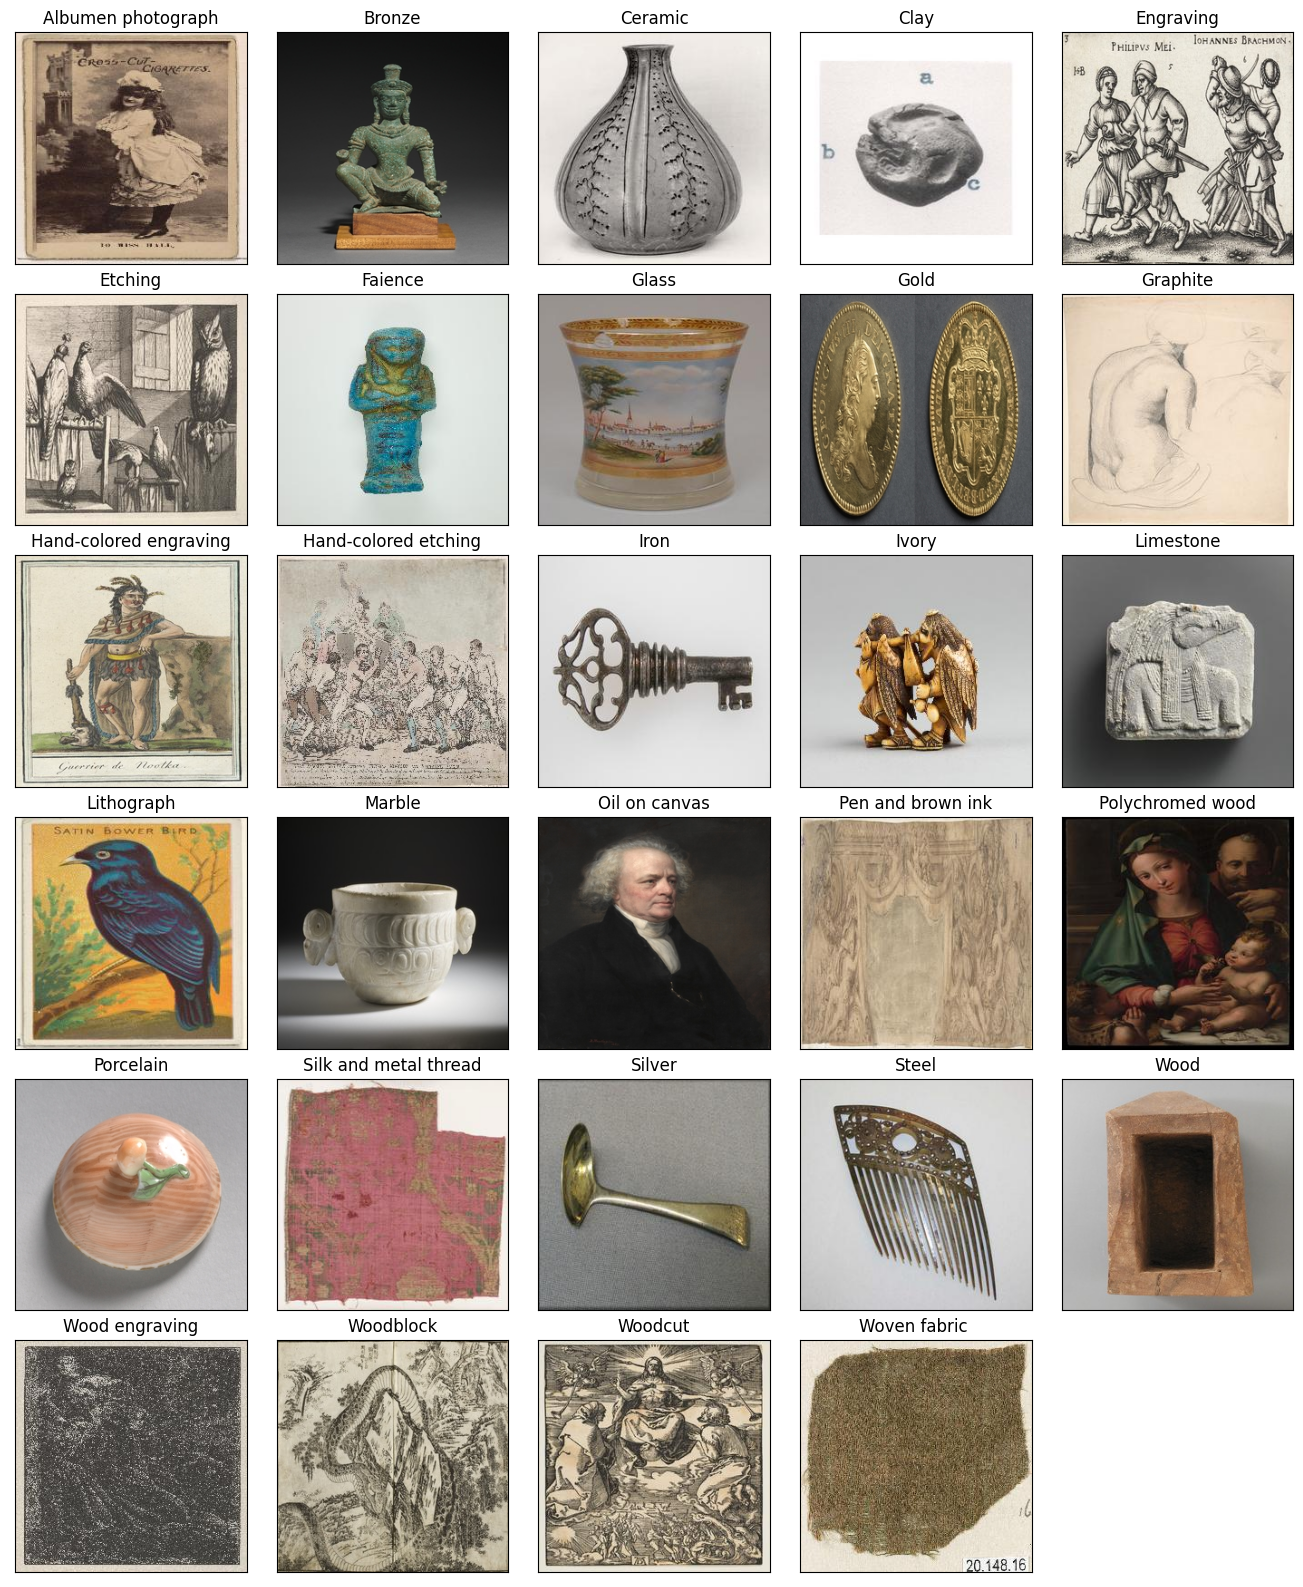

In [ ]:
fig = plt.figure(figsize=(20.,20.))
grid = ImageGrid(fig, 111,  # similar to subplot(111)
                 nrows_ncols=(6, 5),  # creates 2x2 grid of axes
                 axes_pad=0.3,  # pad between axes in inch.
)

for ax, medium in zip(grid, list(np.unique(data_df.Medium))):
    filepath = data_df[data_df.Medium == medium].sample(1).Organized_img_path.values[0]
    img = load_img(filepath)
    ax.imshow(img)
    ax.title.label = "hi"
    ax.set_title(medium)
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

grid[-1].remove()

plt.show()

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pickle, json, os, random 
from mpl_toolkits.axes_grid1 import ImageGrid
from tensorflow.keras.preprocessing.image import load_img 
import tensorflow as tf
import shutil
import wandb

2022-10-03 05:39:24.961026: I tensorflow/core/util/util.cc:169] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.


### Setting seed

In [24]:
len(new_img_paths)

37407

In [25]:
data_df['Organized_img_path'] = new_img_paths

In [26]:
data_df.head(5)

Image file         Medium                      Museum  \
0  436018.jpg  Oil on canvas  Metropolitan Museum of Art   
1   11779.jpg  Oil on canvas  Metropolitan Museum of Art   
2   19022.jpg  Oil on canvas  Metropolitan Museum of Art   
3  435883.jpg  Oil on canvas  Metropolitan Museum of Art   
4   10481.jpg  Oil on canvas  Metropolitan Museum of Art   

  Museum-based instance ID Subset   Width  Height  Product size  Aspect ratio  \
0                29.100.60  train  3144.0  3840.0    12072960.0        0.8187   
1                 1982.373  train  1707.0  2136.0     3646152.0        0.7992   
2                 2006.418  train  2845.0  3811.0    10842295.0        0.7465   
3                 61.101.3  train  3811.0  2916.0    11112876.0        1.3069   
4                    09.95  train  3811.0  2099.0     7999289.0        1.8156   

                      Organized_img_path  
0  ./data/train/Oil on canvas/436018.jpg  
1   ./data/train/Oil on canvas/11779.jpg  
2   ./data/train/Oil on canvas/19022.jpg  
3  ./data/train/Oil on canvas/435883.jpg  
4   ./data/train/Oil on canvas/10481.jpg

In [29]:
data_df.to_csv('Organized_MAMe_dataset.csv')

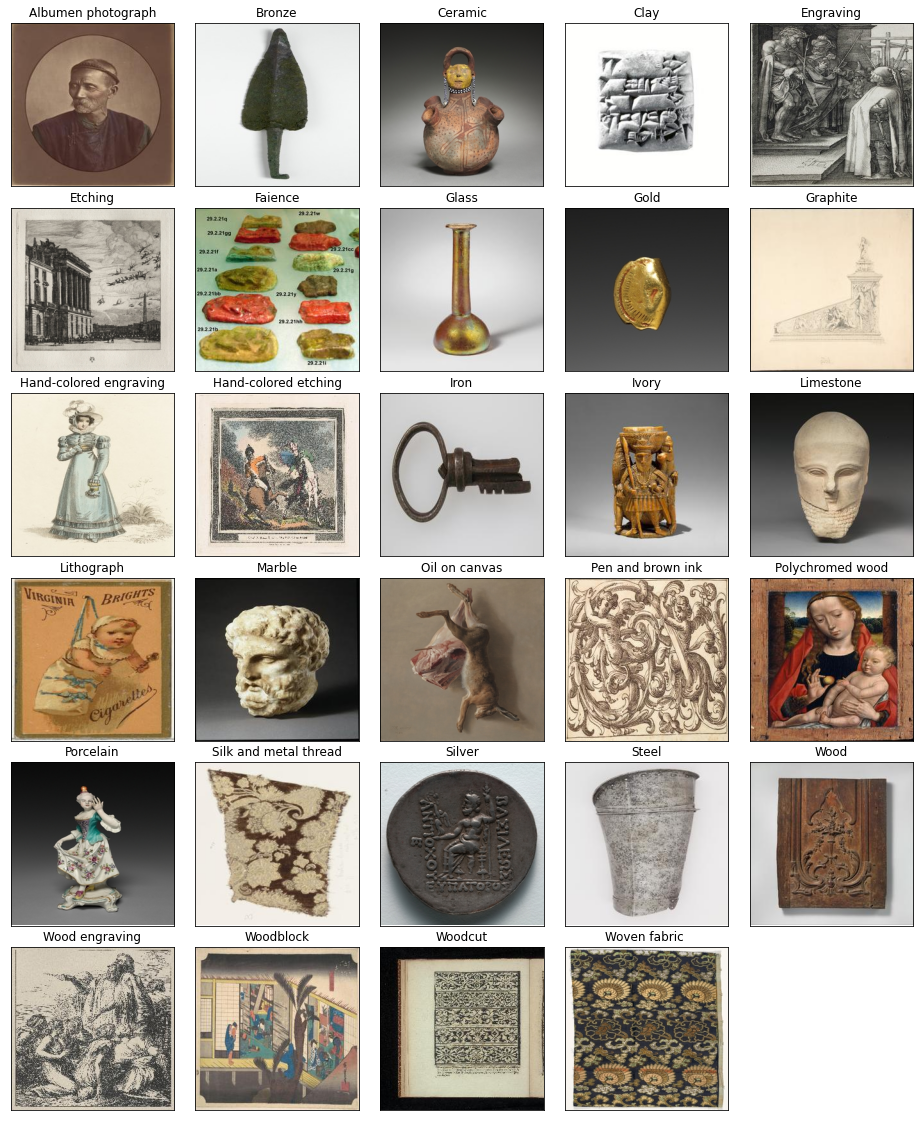

In [30]:
fig = plt.figure(figsize=(20.,20.))
grid = ImageGrid(fig, 111,  # similar to subplot(111)
                 nrows_ncols=(6, 5),  # creates 2x2 grid of axes
                 axes_pad=0.3,  # pad between axes in inch.
)

for ax, medium in zip(grid, list(np.unique(data_df.Medium))):
    filepath = data_df[data_df.Medium == medium].sample(1).Organized_img_path.values[0]
    img = load_img(filepath)
    ax.imshow(img)
    ax.title.label = "hi"
    ax.set_title(medium)
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

grid[-1].remove()

plt.show()

## Building Model

#### Difference tensorflow.keras and keras??

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pickle, json, os, random 
from mpl_toolkits.axes_grid1 import ImageGrid
from tensorflow.keras.preprocessing.image import load_img 
import tensorflow as tf
import shutil
import wandb

2022-10-03 05:52:13.517181: I tensorflow/core/util/util.cc:169] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.


In [2]:
import time
# import keras
import tensorflow as tf
from tensorflow.keras.optimizers import SGD, Adam
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping

from tensorflow.keras.preprocessing.image import ImageDataGenerator
# from tensorflow.keras.utils import np_utils

In [3]:
seed = 168 
def set_seed(seed: int = 42) -> None:
    random.seed(seed)
    np.random.seed(seed)
    tf.random.set_seed(seed)
    tf.experimental.numpy.random.seed(seed)
    # tf.set_random_seed(seed)
    # When running on the CuDNN backend, two further options must be set
    os.environ['TF_CUDNN_DETERMINISTIC'] = '1'
    os.environ['TF_DETERMINISTIC_OPS'] = '1'
    # Set a fixed value for the hash seed
    os.environ["PYTHONHASHSEED"] = str(seed)
    print(f"Random seed set as {seed}")
set_seed(seed)

Random seed set as 168


In [4]:
train_folder = './data/train' 
val_folder = './data/test' 
test_folder = './data/val' 

In [5]:
# Initialize some variables
img_height, img_width = 256, 256
num_classes = 29
n_channels = 3
input_shape = (img_height, img_width, n_channels)
batch_size = 128
epochs = 10

In [6]:
X_train = tf.keras.utils.image_dataset_from_directory(
    train_folder, 
    batch_size=batch_size, #  batch_size 
    # image_size=(img_height, img_width), # resize
    shuffle=True,
    seed=seed
)

X_val = tf.keras.utils.image_dataset_from_directory(
    val_folder, 
    batch_size=batch_size, #  batch_size 
    # image_size=(img_height, img_width), # resize
    shuffle=False,    
    # seed=123,
)

X_test = tf.keras.utils.image_dataset_from_directory(
    test_folder, 
    batch_size=batch_size, #  batch_size 
    # image_size=(img_height, img_width), # resize    
    shuffle=False,    
    # seed=123,
)

Found 20300 files belonging to 29 classes.


2022-10-03 05:52:21.788113: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-10-03 05:52:22.411522: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1532] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 22310 MB memory:  -> device: 0, name: NVIDIA GeForce RTX 3090, pci bus id: 0000:8a:00.0, compute capability: 8.6


Found 15657 files belonging to 29 classes.
Found 1450 files belonging to 29 classes.


In [7]:
print('Using TensorFlow version', tf.__version__)

Using TensorFlow version 2.9.0


In [10]:
print(tf.config.list_physical_devices('GPU'))

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


In [8]:
# Model architecture
model = Sequential()
model.add(Conv2D(32, kernel_size=(5, 5), activation='relu', kernel_initializer='he_normal', padding='same', input_shape=input_shape, data_format='channels_last'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, kernel_size=(3, 3), activation='relu', kernel_initializer='he_normal', padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(128, kernel_size=(3, 3), activation='relu', kernel_initializer='he_normal',padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dense(num_classes, activation=(tf.nn.softmax)))

# Print model summary
# print(model.summary())

## Adding wandb Callback

In [11]:
wandb.init()
wandb_callback = wandb.keras.WandbCallback()

wandb: Currently logged in as: summerzhang. Use `wandb login --relogin` to force relogin


wandb: WARNING The save_model argument by default saves the model in the HDF5 format that cannot save custom objects like subclassed models and custom layers. This behavior will be deprecated in a future release in favor of the SavedModel format. Meanwhile, the HDF5 model is saved as W&B files and the SavedModel as W&B Artifacts.


In [ ]:
# Launch 20 experiments, trying different dropout rates
for run in range(20):
  # Start a run, tracking hyperparameters
wandb.init(
      project="keras-intro",
      # Set entity to specify your username or team name
      # ex: entity="wandb",
      config={
          "layer_1": 512,
          "activation_1": "relu",
          "dropout": random.uniform(0.01, 0.80),
          "layer_2": 10,
          "activation_2": "softmax",
          "optimizer": "sgd",
          "loss": "sparse_categorical_crossentropy",
          "metric": "accuracy",
          "epoch": 6,
          "batch_size": 256
      })
    config = wandb.config


In [ ]:
model.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), optimizer=Adam(lr=0.001, epsilon=0.1, amsgrad=True), metrics=["accuracy"])
# Use early stopping
early = EarlyStopping(monitor='val_loss', min_delta=1e-4, patience=10, verbose=1, mode='auto', restore_best_weights=True)

# Train the model 
t0 = time.time()
epochs = 100

t0 = time.time()
    
history = model.fit( X_train,
          validation_data=X_val,
          epochs=epochs, 
          callbacks=[logging_callback]                    
)
    
print('Model trained in {:.1f}min'.format((time.time()-t0)/60))

Epoch 1/100


2022-10-03 05:57:56.022047: I tensorflow/stream_executor/cuda/cuda_dnn.cc:384] Loaded cuDNN version 8101
2022-10-03 05:57:58.257300: I tensorflow/stream_executor/cuda/cuda_blas.cc:1786] TensorFloat-32 will be used for the matrix multiplication. This will only be logged once.


159/159 [==============================] - 24s 116ms/step - loss: 3.3442 - accuracy: 0.0469 - val_loss: 3.3226 - val_accuracy: 0.0562
Epoch 2/100
159/159 [==============================] - 18s 113ms/step - loss: 3.2785 - accuracy: 0.0814 - val_loss: 3.2242 - val_accuracy: 0.1066
Epoch 3/100
159/159 [==============================] - 18s 115ms/step - loss: 3.0844 - accuracy: 0.1478 - val_loss: 2.9574 - val_accuracy: 0.1687
Epoch 4/100
159/159 [==============================] - 18s 115ms/step - loss: 2.8087 - accuracy: 0.2261 - val_loss: 2.6641 - val_accuracy: 0.2582
Epoch 5/100
159/159 [==============================] - 18s 114ms/step - loss: 2.4562 - accuracy: 0.3140 - val_loss: 2.3160 - val_accuracy: 0.3372
Epoch 6/100
159/159 [==============================] - 18s 114ms/step - loss: 2.2095 - accuracy: 0.3666 - val_loss: 2.1909 - val_accuracy: 0.3604
Epoch 7/100
159/159 [==============================] - 18s 115ms/step - loss: 2.0587 - accuracy: 0.3979 - val_loss: 2.1172 - val_accurac

## Evaluate the Model

In [ ]:
import seaborn as sns
from sklearn.metrics import classification_report,confusion_matrix

def evaluate_model(model, eval_gen):
    """ Evaluate given model and print results.
    Show validation loss and accuracy, classification report and 
    confusion matrix.

    Args:
        model (model): model to evaluate
        eval_gen (ImageDataGenerator): evaluation generator
    """
    # Evaluate the model
    eval_gen.reset()
    score = model.evaluate(eval_gen, verbose=0)
    print('\nLoss:', score[0])
    print('Accuracy:', score[1])
    
    # Confusion Matrix (validation subset)
    eval_gen.reset()
    pred = model.predict(eval_gen, verbose=0)

    # Assign most probable label
    predicted_class_indices = np.argmax(pred,axis=1)

    # Get class labels
    labels = (eval_gen.class_indices)
    target_names = labels.keys()

    # Plot statistics
    print(classification_report(eval_gen.classes, predicted_class_indices, target_names=target_names))

    cf_matrix = confusion_matrix(np.array(eval_gen.classes), predicted_class_indices)
    fig, ax = plt.subplots(figsize=(13, 13)) 
    sns.heatmap(cf_matrix, annot=True, cmap='PuRd', cbar=False, square=True, xticklabels=target_names, yticklabels=target_names)
    plt.show()
    
evaluate_model(model, validation_generator)